<a href="https://colab.research.google.com/github/abartczak01/ML-water-potability/blob/main/water_potability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


# Preprocessing

In [ ]:
data = pd.read_csv("/content/drive/MyDrive/colab/water_potability.csv")

In [ ]:
data

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Brakujące dane

In [ ]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

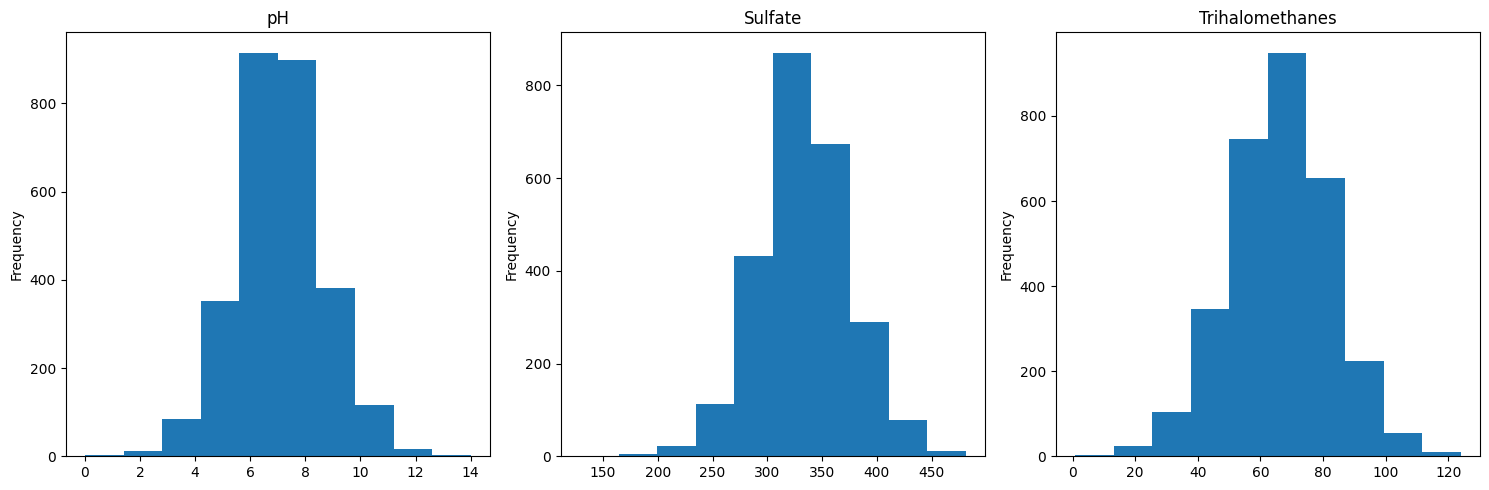

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
data['ph'].plot(kind='hist', ax=axes[0], title='pH')
data['Sulfate'].plot(kind='hist', ax=axes[1], title='Sulfate')
data['Trihalomethanes'].plot(kind='hist', ax=axes[2], title='Trihalomethanes')

plt.tight_layout()
plt.show()

Kolumny w których brakuje wartości mają kształt rozkładów nomralnych, więc uzupełniono je wartościami średnimi.

In [ ]:
data.fillna(data.mean(), inplace=True)

In [ ]:
data.info()
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

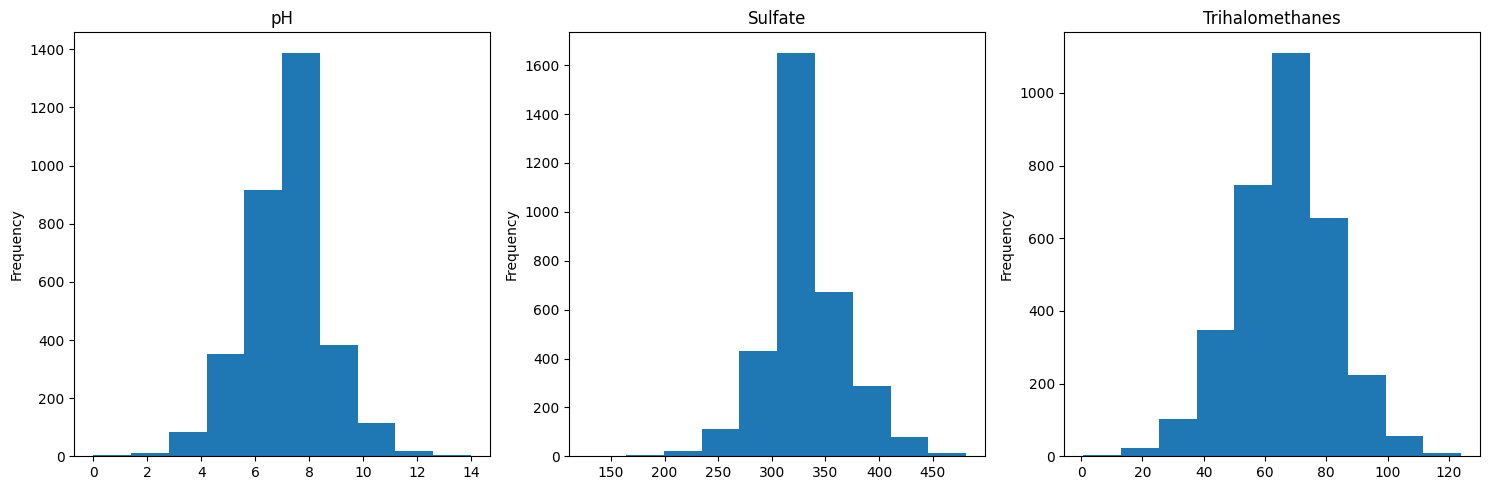

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
data['ph'].plot(kind='hist', ax=axes[0], title='pH')
data['Sulfate'].plot(kind='hist', ax=axes[1], title='Sulfate')
data['Trihalomethanes'].plot(kind='hist', ax=axes[2], title='Trihalomethanes')

plt.tight_layout()
plt.show()

In [ ]:
data.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.469956,32.879761,8768.570828,1.583085,36.142612,80.824064,3.308162,15.769881,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.277673,176.850538,15666.690297,6.127421,317.094638,365.734414,12.065801,56.647656,3.439711,0.000000
50%,7.080795,196.967627,20927.833607,7.130299,333.775777,421.884968,14.218338,66.396293,3.955028,0.000000
75%,7.870050,216.667456,27332.762127,8.114887,350.385756,481.792304,16.557652,76.666609,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


## Balansowanie próbek
Liczność próbek jest zrównoważona w wystarczającym stopniu, więc nie balansowano danych.

In [ ]:
data.Potability.value_counts()

Potability
0    1998
1    1278
Name: count, dtype: int64

<Axes: xlabel='Potability'>

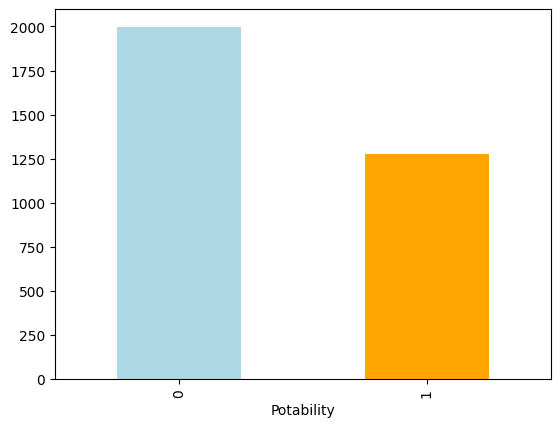

In [ ]:
data.Potability.value_counts().plot(kind="bar", color=["lightblue", "orange"])

In [ ]:
fig = px.pie(data, names="Potability")
fig.update_layout(width=500, height=500)
fig.show()

array([[<Axes: title={'center': 'ph'}>,
        <Axes: title={'center': 'Hardness'}>,
        <Axes: title={'center': 'Solids'}>],
       [<Axes: title={'center': 'Chloramines'}>,
        <Axes: title={'center': 'Sulfate'}>,
        <Axes: title={'center': 'Conductivity'}>],
       [<Axes: title={'center': 'Organic_carbon'}>,
        <Axes: title={'center': 'Trihalomethanes'}>,
        <Axes: title={'center': 'Turbidity'}>]], dtype=object)

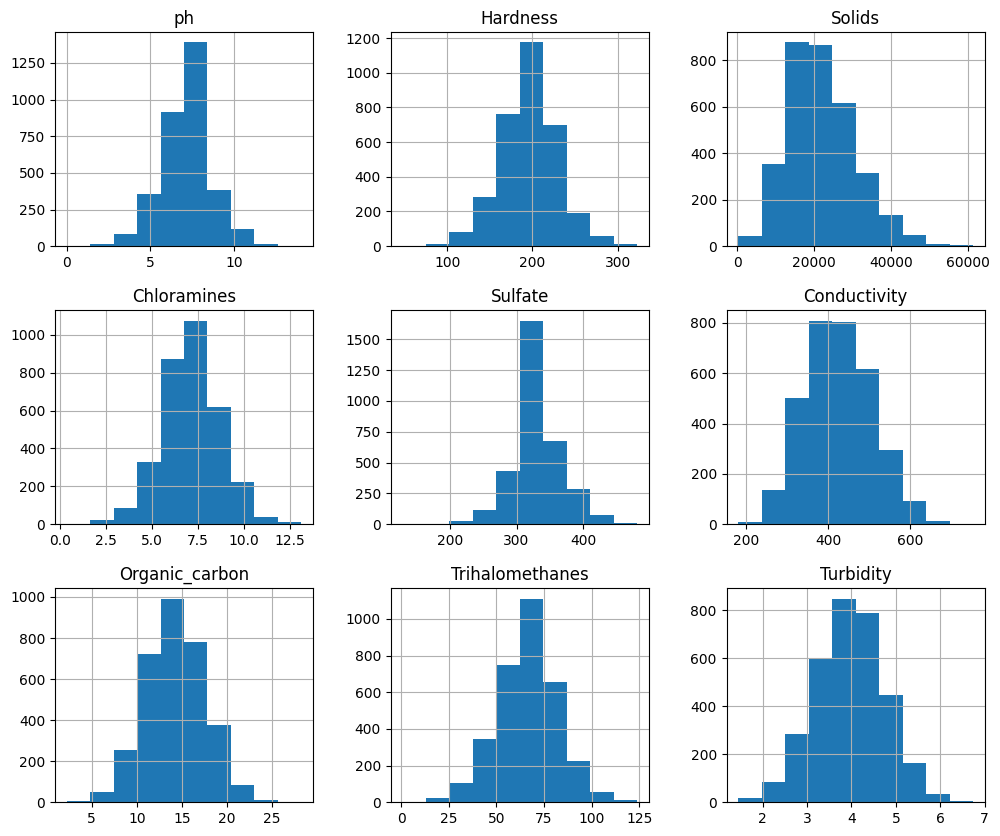

In [ ]:
features_to_plot = data.drop(columns=['Potability'])
features_to_plot.hist(figsize=(12, 10))

## Macierz korelacji cech
Z analizy poniższej macierzy korelacji wynika, że cechy są ze sobą skorelowane w niewielkim stopniu. Stąd nie usunięto żadnej z nich.

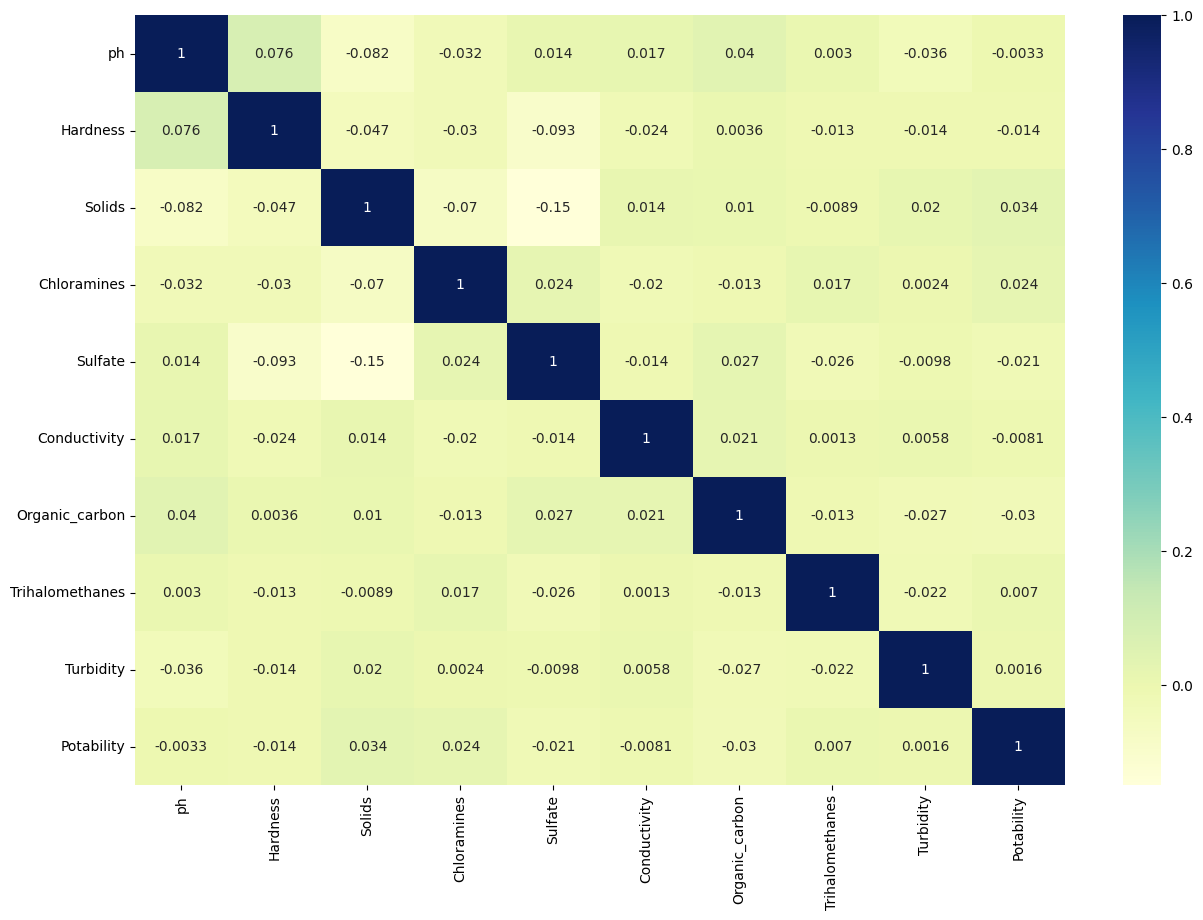

In [ ]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

## Charakterystyka danych

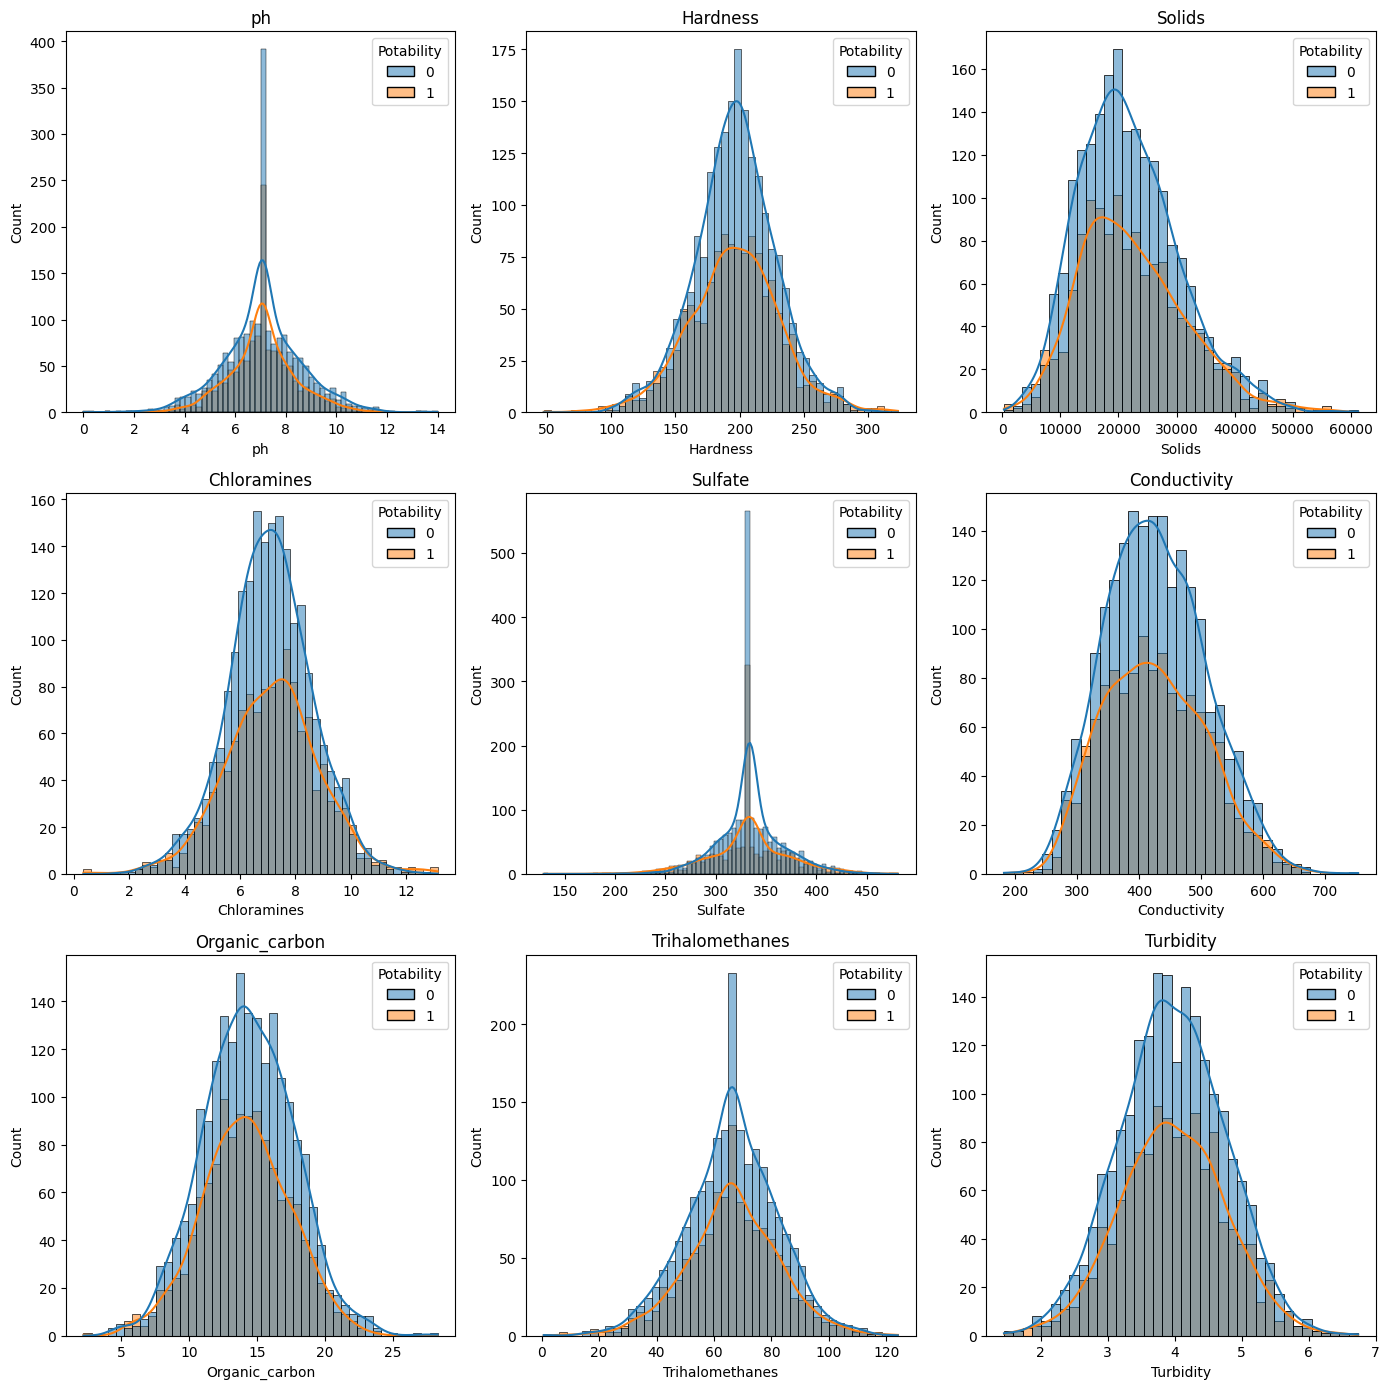

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(14, 14))

axes = axes.flatten()

for i, column in enumerate(data.columns):
    if column != "Potability":
        sns.histplot(data=data, x=column, kde=True, hue="Potability", ax=axes[i])
        axes[i].set_title(column)

plt.tight_layout()
plt.show()

Wartości średnie cech dla wody niezdatnej i zdatnej do spożycia nie różnią się między sobą znacząco. Na podstawie samej analizy wartości średnich nie da się rozróżnić tych dwóch klas.

In [ ]:
data.groupby("Potability").mean().T

Potability,0,1
ph,7.084658,7.074754
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.371700,332.844122
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.308522,66.533513
Turbidity,3.965800,3.968328


## Outliers

Procent wartości odstających dla każdej z cech jest niewielki, większość wynosi mniej niż 3%. Dla siarczanów (Sulfate) wartość ta wyniosła 8%, jednak biorąc pod uwagę charakterystykę tej cechy, wartości odstające (max = 481, min = 129) mieszczą się w normach mg/litr dla wód występującyh w naturalnych zbiornikach wodnych. Stąd zdecydowano o pozostawieniu ich w zestawie danych.

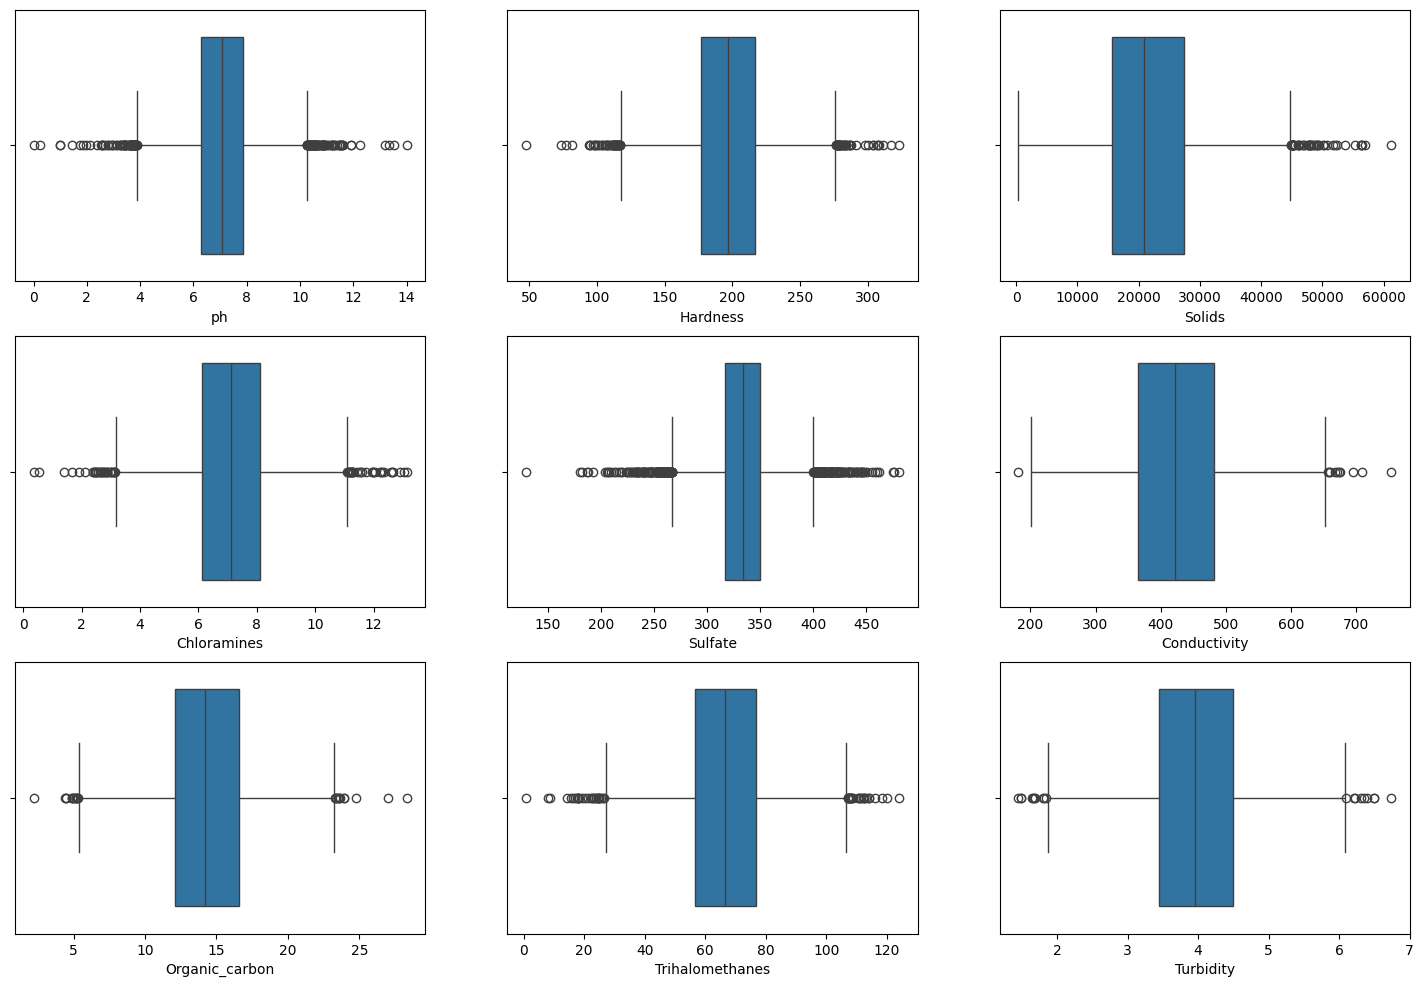

In [ ]:
fig, ax = plt.subplots(ncols=3, nrows=3, figsize=(18,12))
ax = ax.flatten()

index = 0
WHIS = 1.5
for col, values in data.items():
  if col != "Potability":
    sns.boxplot(x=col, data=data,ax=ax[index], whis=WHIS)
    index += 1

plt.show()

In [ ]:
def identify_outliers(column_data, threshold=1.5):
    Q1 = column_data.quantile(0.25)
    Q3 = column_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    outliers_count = len(column_data[(column_data < lower_bound) | (column_data > upper_bound)])
    outliers_percentage = outliers_count / len(column_data) * 100

    return outliers_count, outliers_percentage

outliers_data = []

for column in data.columns:
    outliers_count, outliers_percentage = identify_outliers(data[column])
    outliers_data.append([column, outliers_count, outliers_percentage])

outliers_df = pd.DataFrame(outliers_data, columns=["Column", "Outliers count", "Outliers percentage"])
print(outliers_df)

            Column  Outliers count  Outliers percentage
0               ph             142             4.334554
1         Hardness              83             2.533578
2           Solids              47             1.434676
3      Chloramines              61             1.862027
4          Sulfate             264             8.058608
5     Conductivity              11             0.335775
6   Organic_carbon              25             0.763126
7  Trihalomethanes              54             1.648352
8        Turbidity              19             0.579976
9       Potability               0             0.000000


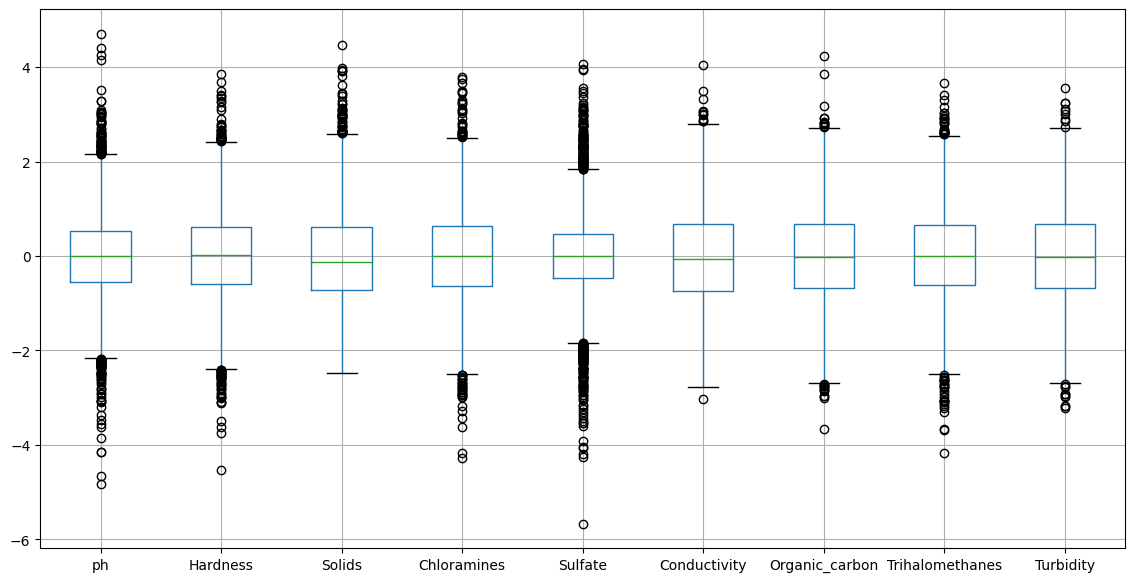

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data.drop(columns=['Potability'])), columns=data.drop(columns=['Potability']).columns)
data_scaled.boxplot(figsize=(14, 7))
plt.show()

In [ ]:
fig = px.scatter(data, x="ph", y="Sulfate", color = "Potability")
fig.show()

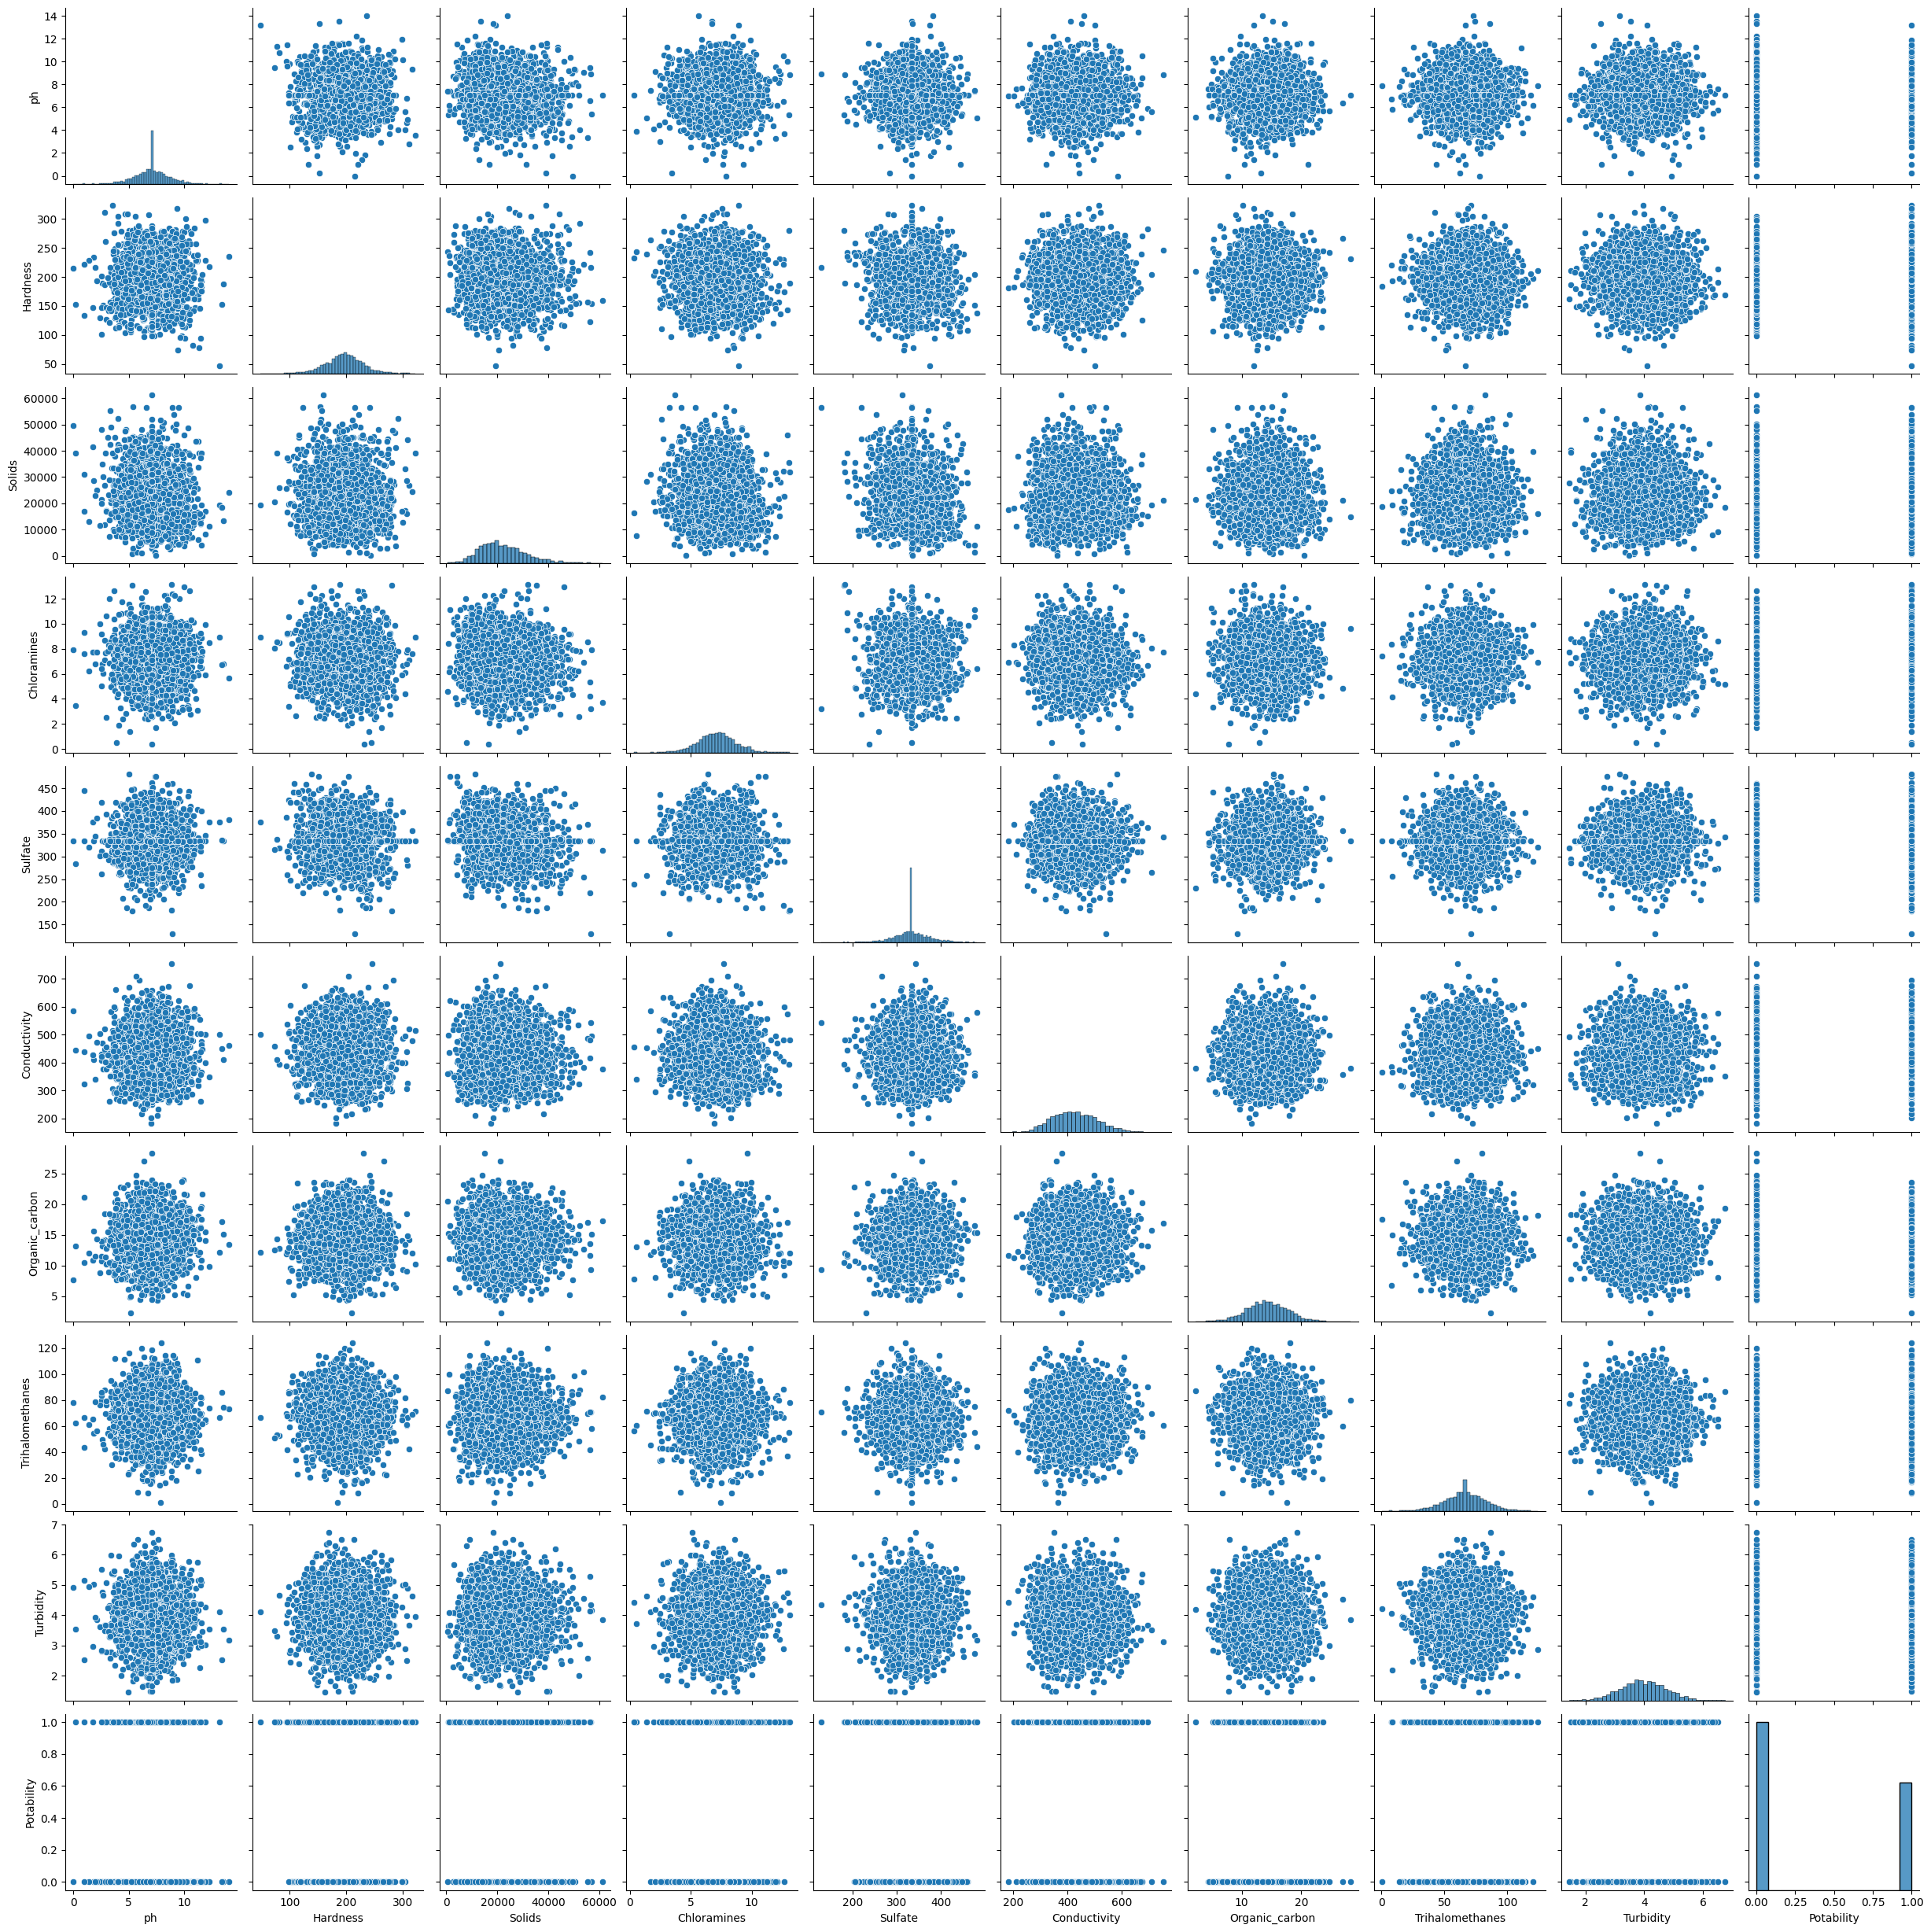

In [ ]:
sns.pairplot(data)

# Klasyfikacja

In [ ]:
X = data.drop(['Potability'], axis=1)
y = data['Potability']

## Skalowanie danych

Kształ rozkładów dla każdej z cech jest zbliżony kształtem do rozkładu normalnego. Stąd dane przeskalowano przy użyciu StandardScaler.

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

## Tworzenie i testowanie prostych klasyfikatorów

In [ ]:
import time
from sklearn.model_selection import cross_val_score, KFold

KF = KFold(n_splits=10, shuffle=True, random_state=21)
features = X_scaled
labels = y

def fit_evaluate_model(model):
    print(model.__class__.__name__, "start")
    model_name = model.__class__.__name__
    start_time = time.time()
    accuracies = cross_val_score(model, features, labels, scoring="accuracy", cv=KF)
    end_time = time.time()
    execution_time = (end_time - start_time)
    return model_name, accuracies.mean()*100, execution_time

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

### wybranie najlepszego knn do dalszych testów

In [ ]:
knn_best_score = 0
knn_best_neighbors = 0
knn_scores_list = []

for i in range(5, 61, 2):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn_scores = cross_val_score(knn, features, labels, cv=KF)
    mean_score = knn_scores.mean()
    knn_scores_list.append((i, mean_score))

    if mean_score > knn_best_score:
        knn_best_score = mean_score
        knn_best_neighbors = i

print(f"Best score: {knn_best_score} for number of neighbours: {knn_best_neighbors}")

Best score: 0.6569105691056911 for number of neighbours: 31


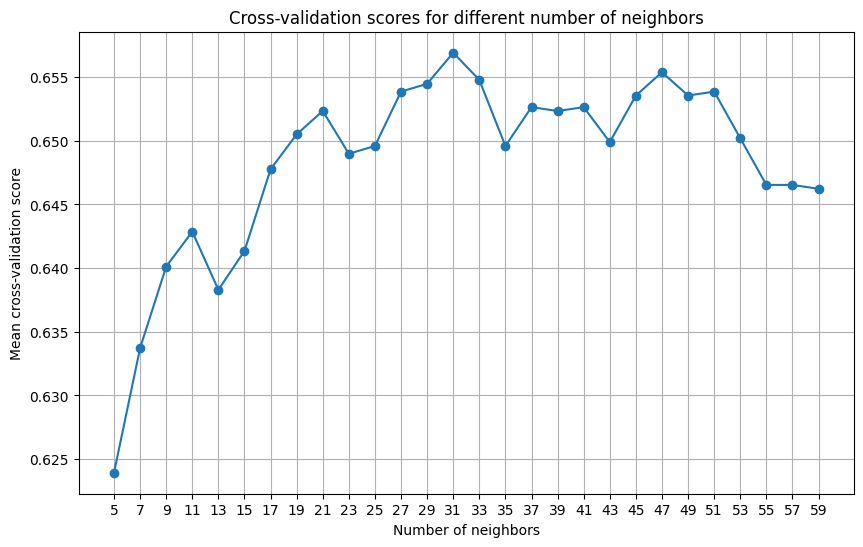

In [ ]:
neighbors, scores = zip(*knn_scores_list)

plt.figure(figsize=(10, 6))
plt.plot(neighbors, scores, marker='o', linestyle='-')
plt.title('Cross-validation scores for different number of neighbors')
plt.xlabel('Number of neighbors')
plt.ylabel('Mean cross-validation score')
plt.xticks(range(5, 61, 2))
plt.grid(True)
plt.show()

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
etc = ExtraTreesClassifier()
svm = SVC()
knn = KNeighborsClassifier(n_neighbors=knn_best_neighbors)
gbc = GradientBoostingClassifier()
abc = AdaBoostClassifier()
nb = GaussianNB()

In [ ]:
models = [lr, dt, rf, etc, svm, knn, gbc, abc, nb]

accu_list = []
model_names = []
execution_times = []

for model in models:
  name, accuracy, ex_time = fit_evaluate_model(model)
  accu_list.append(accuracy)
  model_names.append(name)
  execution_times.append(ex_time)


LogisticRegression start
DecisionTreeClassifier start
RandomForestClassifier start
ExtraTreesClassifier start
SVC start
KNeighborsClassifier start
GradientBoostingClassifier start
AdaBoostClassifier start
GaussianNB start


In [ ]:
model_acc_df = pd.DataFrame({"Model": model_names, "Cross_Val_Accuracy": accu_list, "Execution_Time": execution_times})
model_acc_df

,Model,Cross_Val_Accuracy,Execution_Time
0,LogisticRegression,60.990341,0.178551
1,DecisionTreeClassifier,57.571511,0.745284
2,RandomForestClassifier,66.974342,13.445637
3,ExtraTreesClassifier,67.217405,6.314473
4,SVC,67.706329,4.009162
5,KNeighborsClassifier,65.691057,0.479209
6,GradientBoostingClassifier,64.866861,12.374866
7,AdaBoostClassifier,61.233684,3.287603
8,GaussianNB,62.271761,0.036385


## Multilayer Perceptron - MLP

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
y_encoded = encoder.fit_transform(y.to_numpy().reshape(-1,1))

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=21)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import Accuracy, Precision, Recall
from tensorflow.keras.optimizers import SGD


In [ ]:
mlp1 = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y_encoded.shape[1], activation='softmax')
])

mlp1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

y_train_dense = y_train.toarray()
history = mlp1.fit(X_train, y_train_dense, epochs=100, validation_split=0.2)

Epoch 1/100
66/66 [==============================] - 2s 7ms/step - loss: 0.6785 - accuracy: 0.6073 - val_loss: 0.6607 - val_accuracy: 0.6183
Epoch 2/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6681 - accuracy: 0.6169 - val_loss: 0.6440 - val_accuracy: 0.6546
Epoch 3/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6621 - accuracy: 0.6231 - val_loss: 0.6383 - val_accuracy: 0.6489
Epoch 4/100
66/66 [==============================] - 0s 3ms/step - loss: 0.6452 - accuracy: 0.6455 - val_loss: 0.6159 - val_accuracy: 0.6679
Epoch 5/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6429 - accuracy: 0.6469 - val_loss: 0.6156 - val_accuracy: 0.6718
Epoch 6/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6278 - accuracy: 0.6574 - val_loss: 0.6206 - val_accuracy: 0.6737
Epoch 7/100
66/66 [==============================] - 0s 4ms/step - loss: 0.6259 - accuracy: 0.6489 - val_loss: 0.6021 - val_accuracy: 0.6966
Epoch 8/100
6

In [ ]:
best_epoch = np.argmax(history.history['val_accuracy']) + 1
print(f"Najlepsza epoka: {best_epoch}")

y_test_dense = y_test.toarray()
test_loss, test_accuracy = mlp1.evaluate(X_test, y_test_dense, verbose=0)
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

Najlepsza epoka: 10
Test Accuracy: 60.82%


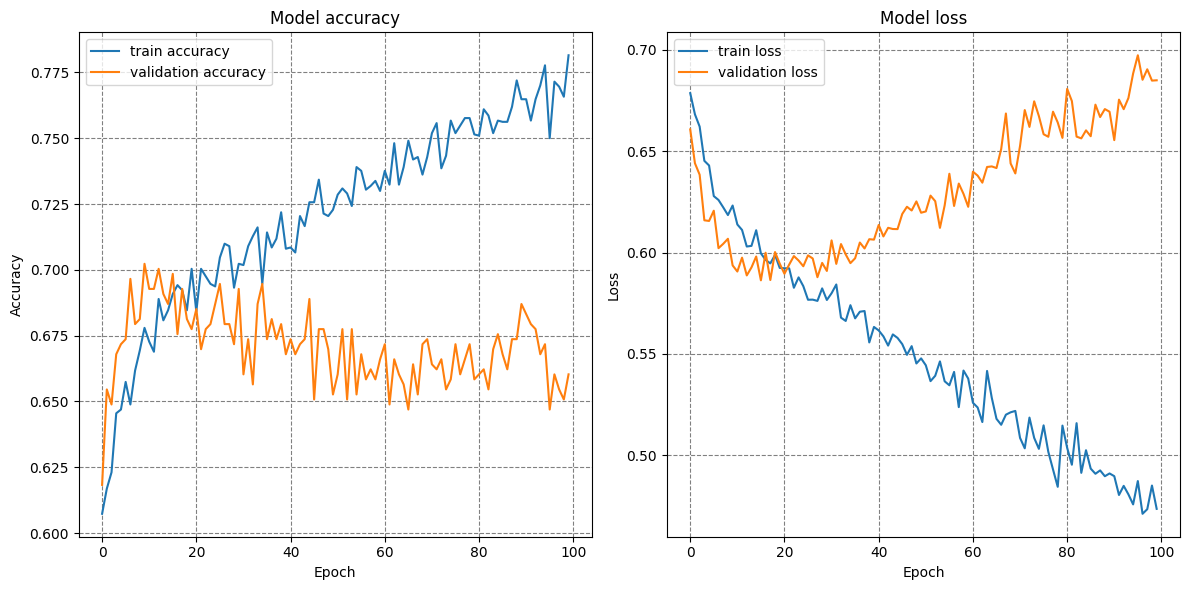

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', color='grey')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True, linestyle='--', color='grey')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
mlp1.save('drive/MyDrive/colab/mlp1.keras')

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report